In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
import skimage.io as io
from skimage.exposure import histogram
from cartonize import cartonize,cartonize2

In [17]:
def show_images(images, titles=None):
    # This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None:
        titles = ["(%d)" % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        plt.axis("off")

        # ax = plt.axes()
        # ax.set_facecolor('yellow')

        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

def showHist(img):
    # An "interface" to matplotlib.axes.Axes.hist() method
    plt.figure()
    imgHist = histogram(img, nbins=256)

    plt.bar(imgHist[1].astype(np.uint8), imgHist[0], width=0.8, align='center')

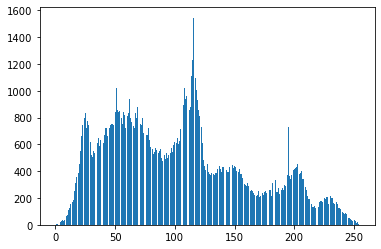

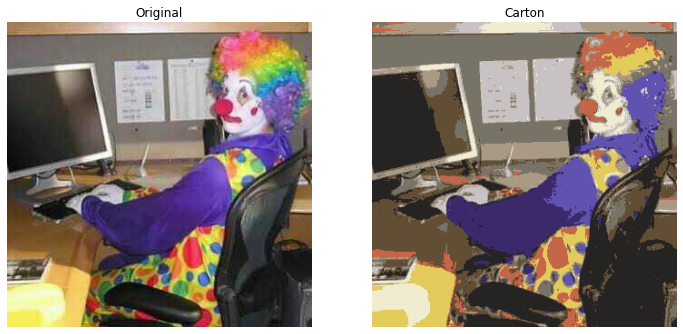

In [18]:
clown_image = io.imread("260141058_327061272563343_1237411883340876619_n.jpg")
showHist(cv2.cvtColor(clown_image, cv2.COLOR_BGR2GRAY))
show_images(images=[clown_image, cartonize(clown_image)], titles=["Original", "Carton"])
#show_images(images=[clown_image, cartonize(clown_image,total_color=15)], titles=["Original", "Carton"])

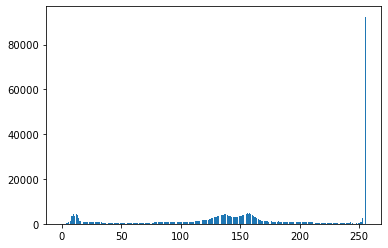

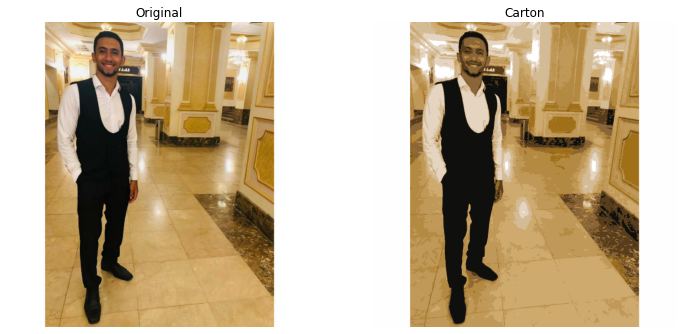

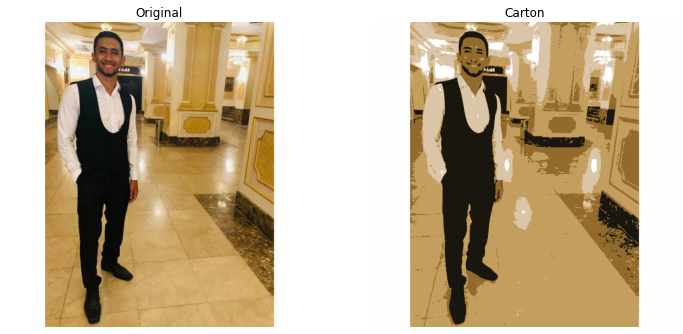

In [19]:
fathy_image = io.imread("266146766_232824912312916_8942212863672222124_n.jpg")
showHist(cv2.cvtColor(fathy_image, cv2.COLOR_BGR2GRAY))
show_images(images=[fathy_image, cartonize(fathy_image)], titles=["Original", "Carton"])
show_images(images=[fathy_image, cartonize(fathy_image,total_color=5)], titles=["Original", "Carton"])

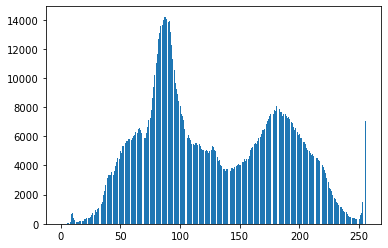

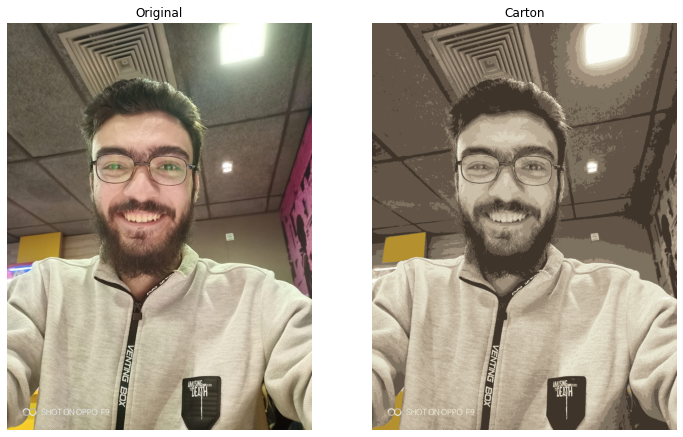

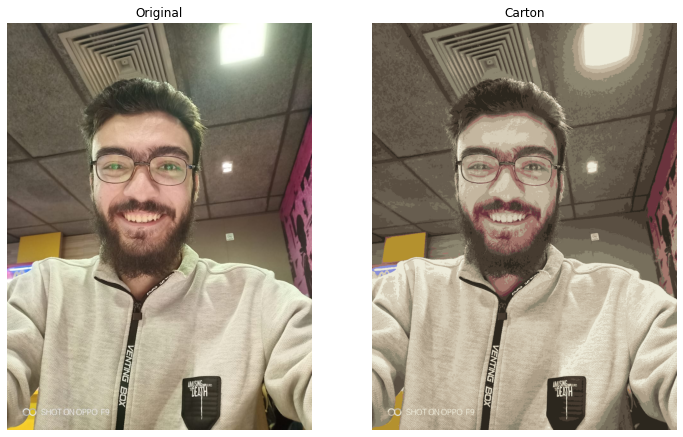

In [20]:
weaam_image = io.imread("4f1fa8ec-e6c8-4b8b-ba39-ba91a157539e.jpg")
showHist(cv2.cvtColor(weaam_image, cv2.COLOR_BGR2GRAY))
show_images(images=[weaam_image, cartonize(weaam_image)], titles=["Original", "Carton"])
show_images(images=[weaam_image, cartonize(weaam_image,total_color=15)], titles=["Original", "Carton"])

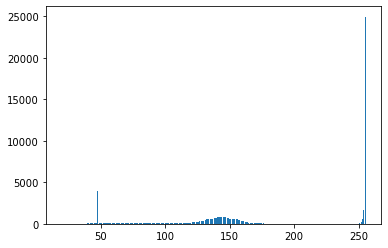

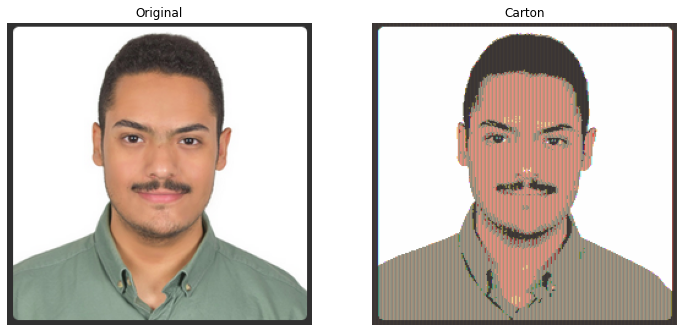

In [23]:
abdullah_image = io.imread("Screenshot from 2022-01-03 20-13-03.png")
showHist(cv2.cvtColor(abdullah_image, cv2.COLOR_BGR2GRAY))
show_images(images=[abdullah_image, cartonize(abdullah_image)], titles=["Original", "Carton"])


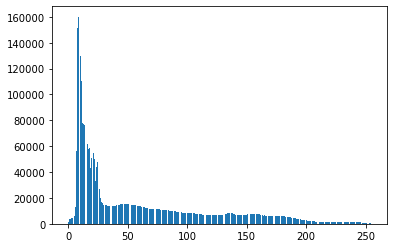

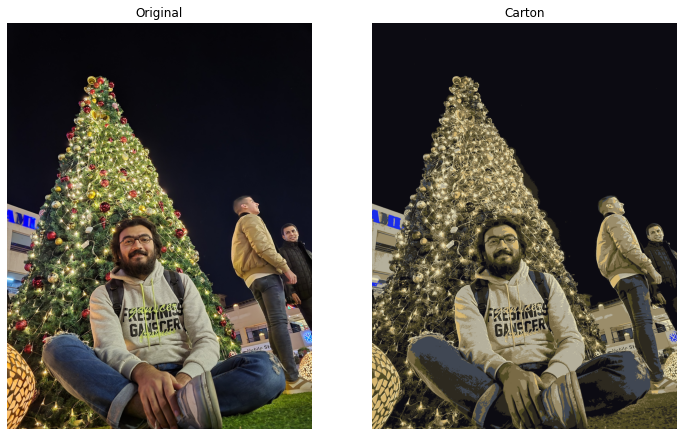

In [22]:
weaam2_image = io.imread("medianBlur_kernel_sizesdsadad.jpg")
showHist(cv2.cvtColor(weaam2_image, cv2.COLOR_BGR2GRAY))
show_images(images=[weaam2_image, cartonize(weaam2_image)], titles=["Original", "Carton"])


In [114]:

from skimage.color import rgb2gray, rgb2hsv
def cartoonize(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 7)
    
    edges = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 7
    )

    color = cv2.bilateralFilter(img, 9, 150, 150)
    cartoon = cv2.bitwise_and(color, color, mask=edges)
    return cartoon


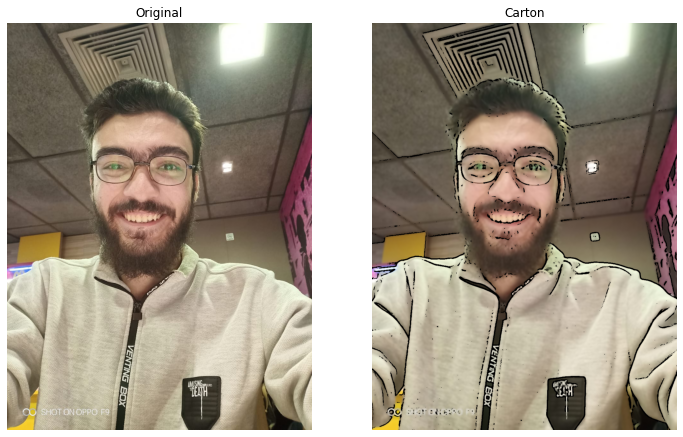

In [119]:
img = weaam_image
show_images(images=[img, cartoonize(img)], titles=["Original", "Carton"])

# io.imshow(cartoonize(img))

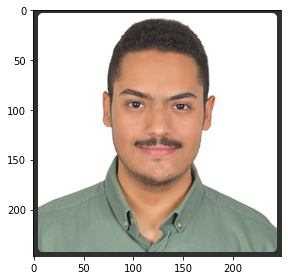

In [108]:
img = io.imread("Screenshot from 2022-01-03 20-13-03.png")
io.imshow(img)

# io.imshow(cartoonize(img))

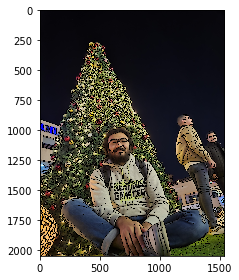

In [87]:
img = io.imread("medianBlur_kernel_sizesdsadad.jpg")
io.imshow(img)

io.imshow(cartoonize(img))

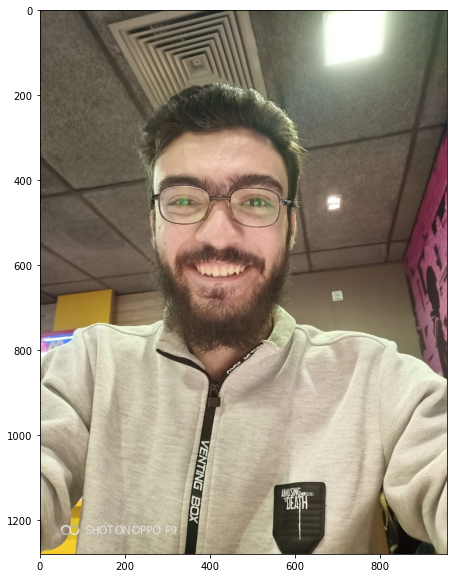

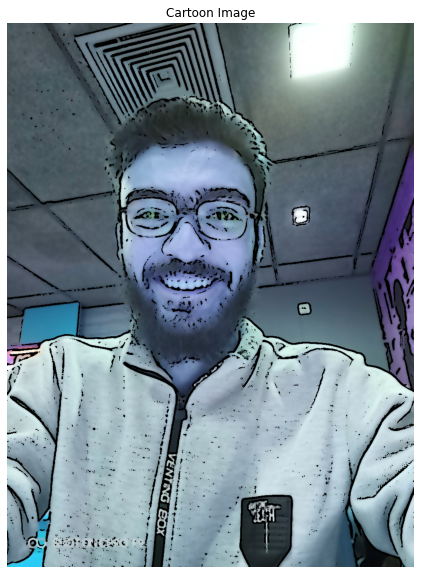

In [47]:

plt.figure(figsize=(10, 10))
plt.imshow(weaam_image)
img = weaam_image
plt.figure(figsize=(10, 10))
plt.imshow(cartoonize(img=img))
plt.axis("off")
plt.title("Cartoon Image")
plt.show()